# 1️⃣ Introduction to Neural Networks

## 📌 What is a Neural Network?
A **Neural Network** is made up of **neurons** that process inputs and produce outputs through layers. The key idea is to learn weights and biases to minimize the prediction error.

## 🧩 Components of Neural Networks

### 1️⃣ Neuron (Single Unit Calculation)

Given:
- Input vector: $ \mathbf{x} = [x_1, x_2, \dots, x_n]^T $
- Weight vector: $ \mathbf{w} = [w_1, w_2, \dots, w_n]^T $
- Bias: $ b $

The neuron computes:
$$
z = \mathbf{w}^T \mathbf{x} + b = \sum_{i=1}^{n} w_i x_i + b
$$
i.e.
```
z = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
a = activation(z)
```

### 2️⃣ Activation Function (Non-Linearity)

The output of the neuron:
$$
a = \phi(z)
$$

#### Common Activation Functions and Derivatives:
| Activation Function       | Formula                             | Derivative                                   |
|---------------------------|--------------------------------------|----------------------------------------------|
| Sigmoid                   | $ \sigma(z) = \frac{1}{1 + e^{-z}} $   | $ \sigma(z) (1 - \sigma(z)) $             |
| Tanh                      | $\tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} $ | $ 1 - \tanh^2(z) $                        |
| ReLU                      | $ \max(0, z) $                    | $ 1 \text{ if } z > 0, 0 \text{ otherwise} $ |

### 3️⃣ Forward Propagation in a Feedforward Neural Network

Single hidden layer example:
$$
z^{(1)} = W^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
$$
$$
a^{(1)} = \phi(z^{(1)})
$$
$$
z^{(2)} = W^{(2)} a^{(1)} + \mathbf{b}^{(2)}
$$
$$
\hat{y} = \phi(z^{(2)})
$$

### 4️⃣ Multi-layer Neural Network Representation

For **L layers**:
$$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}
$$
$$
a^{(l)} = \phi(z^{(l)})
$$
Final output:
$$
\hat{y} = a^{(L)}
$$

### 5️⃣ Example: XOR Problem (Non-linearity Importance)

| x₁ | x₂ | XOR output |
|----|----|------------|
| 0  | 0  | 0          |
| 0  | 1  | 1          |
| 1  | 0  | 1          |
| 1  | 1  | 0          |

Linear models cannot solve XOR, but neural networks with a hidden layer and non-linear activations can.

### 6️⃣ Gradient of Activation Functions

| Activation       | Derivative                      |
|------------------|---------------------------------|
| Sigmoid          | $ \sigma(z)(1 - \sigma(z)) $  |
| Tanh             | $1 - \tanh^2(z) $            |
| ReLU             | $ 1 \text{ if } z > 0, 0 \text{ else} $ |

These derivatives are used for **backpropagation** to update weights.

### 7️⃣ Chain Rule in Neural Networks

$$
\frac{\partial \text{Loss}}{\partial W^{(l)}} = \frac{\partial \text{Loss}}{\partial a^{(L)}} \cdot \frac{\partial a^{(L)}}{\partial z^{(L)}} \cdot \dots \cdot \frac{\partial z^{(l)}}{\partial W^{(l)}}
$$

Back propagation relies on the chain rule to flow gradients from the output layer back through the network.

## ✅ Summary of Mathematical Components:

| Component             | Mathematical Expression                      |
|------------------------|-----------------------------------------------|
| Neuron (Pre-activation) | $ z = \mathbf{w}^T \mathbf{x} + b $        |
| Activation Output      | $ a = \phi(z) $                            |
| Feedforward Step       | $ z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} $  |
| Activation Gradient    | Depends on activation function chosen        |
| Chain Rule in NN       | Gradients flow backward via chain rule       |

### 📊 Visualizing a Single Neuron

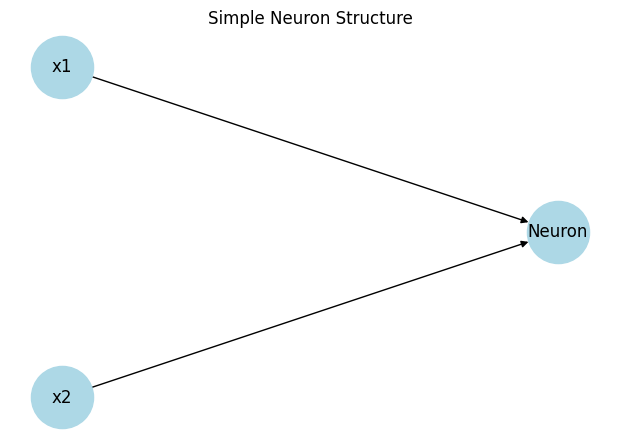

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_node('x1')
G.add_node('x2')
G.add_node('Neuron')
G.add_edges_from([('x1', 'Neuron'), ('x2', 'Neuron')])

pos = {'x1': (0, 1), 'x2': (0, -1), 'Neuron': (1, 0)}
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True)
plt.title('Simple Neuron Structure')
plt.show()

## 🔥 Activation Functions and Visualization
### ➡️ Common Activation Functions:
- **Sigmoid:** S-shaped curve, outputs between 0 and 1.
- **Tanh:** Outputs between -1 and 1.
- **ReLU:** Outputs 0 if input is negative, otherwise outputs the input.

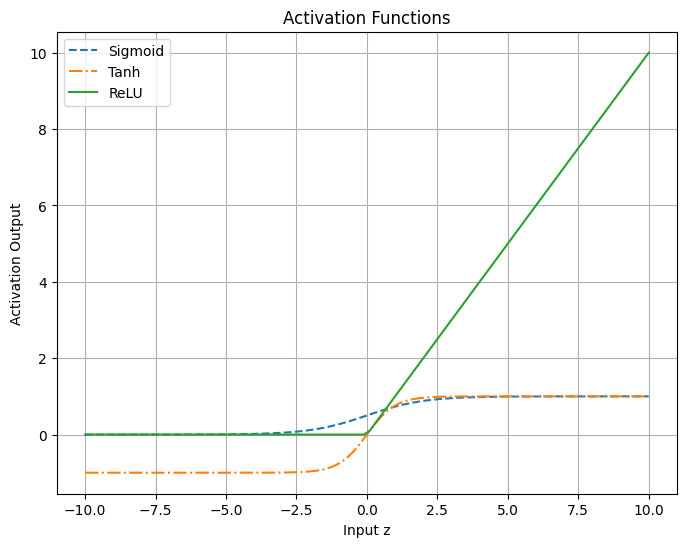

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid(z), label='Sigmoid', linestyle='--')
plt.plot(z, tanh(z), label='Tanh', linestyle='-.')
plt.plot(z, relu(z), label='ReLU', linestyle='-')
plt.title('Activation Functions')
plt.xlabel('Input z')
plt.ylabel('Activation Output')
plt.legend()
plt.grid(True)
plt.show()

## 🏗️ Example: Forward Pass of a Single Neuron (Code)

In [3]:
import numpy as np

def neuron_output(x, w, b):
    z = np.dot(w, x) + b
    return sigmoid(z)

x = np.array([0.6, 0.9])
w = np.array([0.4, 0.7])
b = 0.2

output = neuron_output(x, w, b)
print('Neuron output:', output)

Neuron output: 0.7445969158274759


## 🧠 Visualization: Feedforward Neural Network (2 Inputs, 1 Hidden Layer)

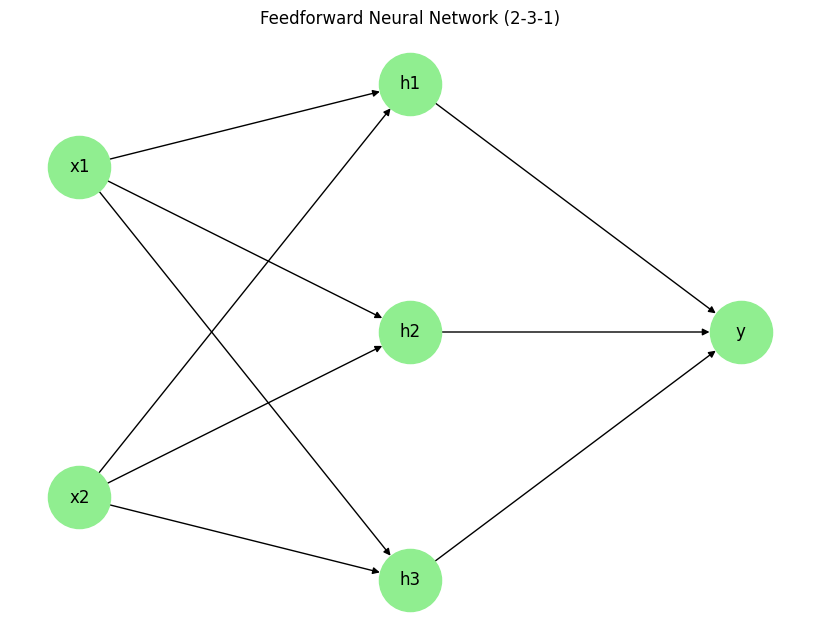

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
input_nodes = ['x1', 'x2']
hidden_nodes = ['h1', 'h2', 'h3']
output_nodes = ['y']
G.add_nodes_from(input_nodes + hidden_nodes + output_nodes)

for i in input_nodes:
    for h in hidden_nodes:
        G.add_edge(i, h)

for h in hidden_nodes:
    for o in output_nodes:
        G.add_edge(h, o)

pos = {
    'x1': (0, 1),
    'x2': (0, -1),
    'h1': (1, 1.5),
    'h2': (1, 0),
    'h3': (1, -1.5),
    'y': (2, 0)
}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightgreen', arrows=True)
plt.title('Feedforward Neural Network (2-3-1)')
plt.show()

## ⚡ Summary of This Section:
- ✅ Neuron = weighted sum of inputs + bias → activation function.
- ✅ Activation functions (Sigmoid, Tanh, ReLU) add non-linearity.
- ✅ Feedforward networks process data from input to output layer.